In [ ]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [ ]:
def anisdiff_bw(U, N, lam, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    l, m = U.shape
    U = np.pad(U, pad_width = 1, mode = 'edge')


    for n in range(0,N):
        p1 = U[1:-1,1:-1]

        p2 = g(np.abs(U[:-2,1:-1] - U[1:-1,1:-1])) * (U[:-2,1:-1] - U[1:-1,1:-1])
        p3 = g(np.abs(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1])
        p4 = g(np.abs(U[1:-1,:-2] - U[1:-1,1:-1])) * (U[1:-1,:-2] - U[1:-1,1:-1])
        p5 = g(np.abs(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:] - U[1:-1,1:-1])
        
        U[1:-1,1:-1]= p1 + lam * (p2 + p3 + p4 + p5)

        #U = np.pad(newU, pad_width=1, mode = 'edge')


    return U
                    

In [ ]:
#use g(x) = np.exp(-(x/sig)**2)
image = imread("/content/drive/MyDrive/acme/balloon.jpg", as_gray=True)
image = image* 1./255.

sig = 0.1
lamb = .25
N = [5, 20, 100]
g = lambda x: np.exp(-(x/sig)**2)
u5 = anisdiff_bw(image, 5, lamb, g)
u20 = anisdiff_bw(image, 20, lamb, g)
u100 = anisdiff_bw(image, 100, lamb, g)
print(u100.shape)


(802, 602)


In [ ]:
print(u5.shape, u20.shape, u100.shape)

(802, 602) (802, 602) (802, 602)


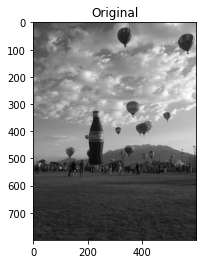

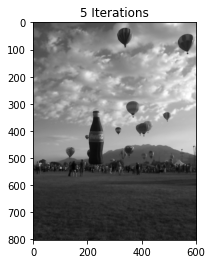

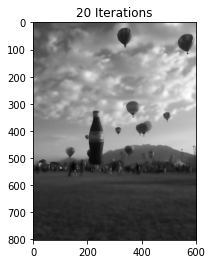

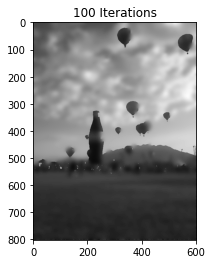

In [ ]:
plt.imshow(image,  cmap="gray")
plt.title("Original")
plt.show()


plt.imshow(u5, cmap="gray")
plt.title("5 Iterations")
plt.show()


plt.imshow(u20, cmap="gray")
plt.title("20 Iterations")
plt.show()

plt.imshow(u100, cmap="gray")
plt.title("100 Iterations")
plt.show()




# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [ ]:
def anisdiff_color(U, N, lambda_, sigma):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    l, m , x = U.shape

    U = np.pad(U, pad_width = 1, mode = 'edge')


    for n in range(0,N):
        p1 = U[1:-1,1:-1]

        p2 = g(norm(U[:-2,1:-1] - U[1:-1,1:-1])) * (U[:-2,1:-1] - U[1:-1,1:-1])
        p3 = g(norm(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1])
        p4 = g(norm(U[1:-1,:-2] - U[1:-1,1:-1])) * (U[1:-1,:-2] - U[1:-1,1:-1])
        p5 = g(norm(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:] - U[1:-1,1:-1])
        
        U[1:-1,1:-1]= p1 + lam * (p2 + p3 + p4 + p5)



    return U[:,:,1:-1]

In [ ]:
image = imread("/content/drive/MyDrive/acme/balloons_color.jpg")
image = image * 1./255
lam = .25
sigma = .1
u5 = anisdiff_color(image, 5, lam, sigma)
u20 = anisdiff_color(image, 20, lam, sigma)

u100 = anisdiff_color(image, 100, lam, sigma)


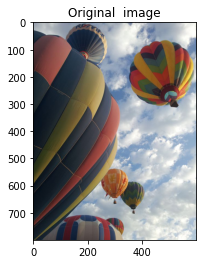

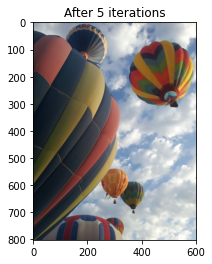

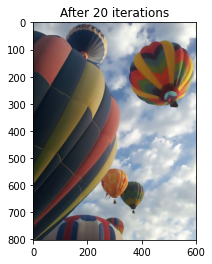

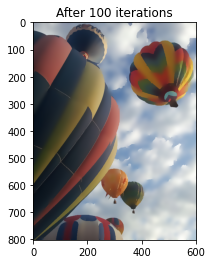

In [ ]:
plt.imshow(image, cmap="gray")
plt.title("Original  image")
plt.show()

plt.imshow(u5, cmap="gray", vmin = 0)
plt.title("After 5 iterations")
plt.show()


plt.imshow(u20, cmap="gray", vmin = 0)
plt.title("After 20 iterations")
plt.show()

plt.imshow(u100, cmap="gray", vmin = 0)
plt.title("After 100 iterations")
plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

In [ ]:
image = imread("/content/drive/MyDrive/acme/balloon.jpg", as_gray=True)
orig_image = imread("/content/drive/MyDrive/acme/balloon.jpg", as_gray=True)

x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

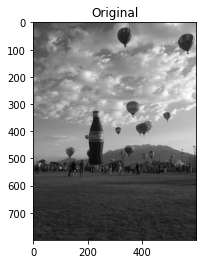

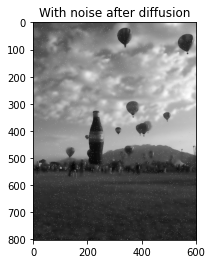

The reason the diffusion doesn't fix the noise problem is because it isn't designed to deal with edges. Since the pixels have sharp edges, they are kind of ignored.


In [ ]:
image = image * 1./255
#noisy_image = noisy_image * 1./255
lamb = .25

noisy_diff = anisdiff_bw(image, 20, lamb, g)

plt.imshow(orig_image, cmap="gray")
plt.title("Original")
plt.show()

#plt.imshow(noisy_image, cmap="gray")
#plt.title("With noise")
#plt.show()

plt.imshow(noisy_diff, cmap = "gray")
plt.title("With noise after diffusion")
plt.show()

print("The reason the diffusion doesn't fix the noise problem is because it isn't designed to deal with edges. Since the pixels have sharp edges, they are kind of ignored.")

The type of blurring that we are doing doesn't work on these tiny grains for the same reason it doesn't blur edges- it is not designed to specifically take out the different parts of an image.

# Problem 4 (Optional)

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [ ]:
#image = imread('balloons_color.jpg')
#x,y,z = image.shape
"""
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
"""

'\nfor dim in range(z):\n    for i in range(x*y//100):\n        # Assign a random value to a random place\n        image[randint(x),randint(y),dim] = 127 + randint(127)\n'